In [1]:
# ME17B158 - Omkar Nath

## Week 6: Dimensionality Reduction (PCA) and Model Validation

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1 = pd.read_csv("data1.csv", header=-1).rename(columns={0:"x1", 1:"x2"})
data1.head()

,x1,x2
0,-3.086760,0.012814
1,2.368870,-0.056970
2,-0.741769,0.089533
3,-1.221298,0.145294
4,-2.080397,0.118519


Text(0.5, 1.0, 'Visualizing the Data')

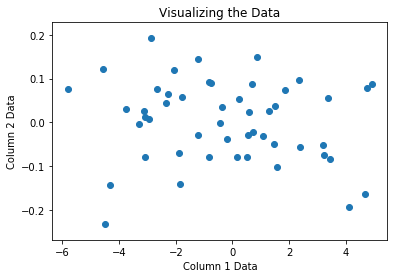

In [4]:
plt.scatter(data1.x1, data1.x2)
plt.xlabel("Column 1 Data")
plt.ylabel("Column 2 Data")
plt.title("Visualizing the Data")

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [5]:
l1 = np.linalg.norm(data1.x1.to_numpy())
l2 = np.linalg.norm(data1.x2.to_numpy())

print("Losses are:  ",l1, l2)

Losses are:   18.923622972997496 0.6473998397017288


In [6]:
# Based on this, the x1 column should be retained

**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

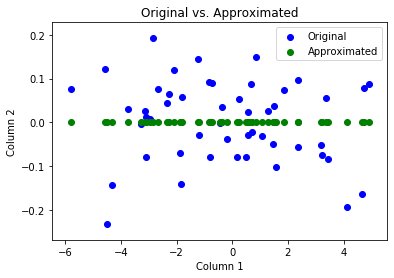

In [7]:
fig=plt.figure()
plt.scatter(data1.x1, data1.x2, color='blue', label = "Original")
plt.scatter(data1.x1, np.zeros((len(data1.x2),1)), color='green', label = "Approximated")
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Original vs. Approximated')
plt.legend()
plt.show()

**(2a) Load the data file 'data2.csv'.**

In [8]:
data2 = pd.read_csv("data2.csv", header=-1).rename(columns={0:"x1", 1:"x2", 2:"x3", 3:"x4"})
data2.head()

,x1,x2,x3,x4
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913


**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

In [9]:
losses = [0, 0, 0, 0]

l1 = np.linalg.norm(data2.x1.to_numpy())
l2 = np.linalg.norm(data2.x2.to_numpy())
l3 = np.linalg.norm(data2.x3.to_numpy())
l4 = np.linalg.norm(data2.x4.to_numpy())

# Keeping no features
losses[0] = l1+l2+l3+l4

# Keeping 1 Feature
losses[1] = (l1+l2+l3+l4) - max(l1, l2, l3, l4)

# Keeping 2 features
losses[2] = min(l1+l2, l1+l3, l1+l4, l2+l3, l2+l4, l3+l4)

# Keeping 3 Features
losses[3] = min(l1, l2, l3, l4)

Text(0.5, 1.0, 'Loss of varying no. of features')

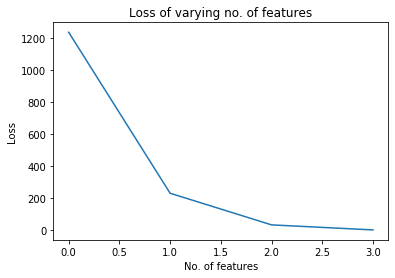

In [10]:
plt.plot([0,1,2,3], losses)
plt.xlabel("No. of features")
plt.ylabel("Loss")
plt.title("Loss of varying no. of features")

In [11]:
print(l1,l2,l3,l4)

31.475594614227592 197.8592044230015 1006.6720533950764 2.259576325533821


In [12]:
# Based on the above, we have, in decreasing order of importance, Columns 3,2,1,0

In [13]:
# Write Code here
print("Decreasing order of Importance: [2 1 0 3]")

Decreasing order of Importance: [2 1 0 3]


**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [14]:
cov_matrix = data2.cov()
cov_matrix

,x1,x2,x3,x4
x1,0.987196,-0.057179,-0.140991,0.003057
x2,-0.057179,39.182190,0.116676,-0.007770
x3,-0.140991,0.116676,1008.989796,0.055835
x4,0.003057,-0.007770,0.055835,0.005093


Text(0.5, 1, 'Covariance Heatmap')

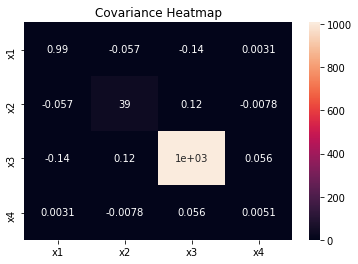

In [15]:
sns.heatmap(cov_matrix, annot = True)
plt.title("Covariance Heatmap")

The diagonal values show the realative importance of each component. This aligns with our earlier observations.
Additionally, no two variables appear to be highly correlated with each other

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

In [16]:
data3 = pd.read_csv("data3.csv", header=-1).rename(columns={0:"x1", 1:"x2"})
data3.head()

,x1,x2
0,-2.173608,-2.191730
1,1.634760,1.715328
2,-0.461201,-0.587819
3,-0.760849,-0.966327
4,-1.387257,-1.554868


Text(0.5, 1.0, 'Visualizing the Data')

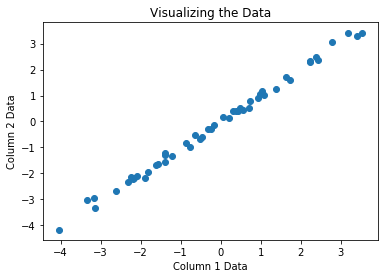

In [17]:
plt.scatter(data3.x1, data3.x2)
plt.xlabel("Column 1 Data")
plt.ylabel("Column 2 Data")
plt.title("Visualizing the Data")

In [18]:
cov_matrix = data3.cov()
cov_matrix

,x1,x2
x1,3.594166,3.617564
x2,3.617564,3.658059


Text(0.5, 1, 'Covariance Heatmap')

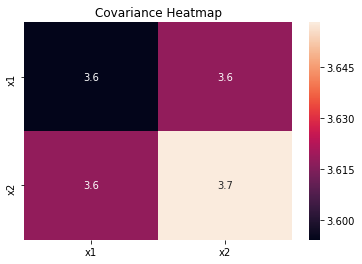

In [19]:
sns.heatmap(cov_matrix, annot = True)
plt.title("Covariance Heatmap")

**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

In [20]:
sklearn_pca = PCA(n_components=1)
data3_transformed = sklearn_pca.fit_transform(data3)

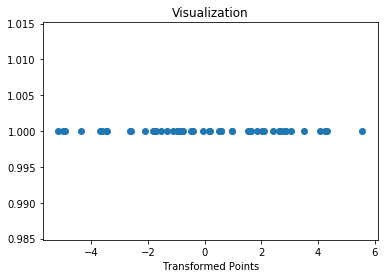

In [21]:
plt.scatter(data3_transformed, [1 for i in range(len(data3_transformed))])
plt.xlabel('Transformed Points')
plt.title('Visualization')
plt.show()

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [22]:
data3_reversed = sklearn_pca.inverse_transform(data3_transformed)
loss_transformed = np.linalg.norm(data3 - data3_reversed)

In [23]:
print("Loss due to PCA transformation:", loss_transformed)

Loss due to PCA transformation: 0.6418403724152458


In [24]:
l1 = np.linalg.norm(data3.x1.to_numpy())
l2 = np.linalg.norm(data3.x2.to_numpy())

print("Losses are:  ",l1, l2)

Losses are:   13.329197109954354 13.448239192570496


Taking only on feature, our loss of data would be around 13.3, without any transformation. As compared to that, with transformation, there is only a loss of 0.6418. This further shows the power of PCA. One point to be noted here is that this was possible because in the given data set, the two variables are highly correlated

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [25]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**

In [26]:
# Write your code here
faces_data = faces.data
#N, height, width = faces.images.shape
sklearn_pca = PCA(n_components = 150)
sklearn_pca.fit(faces_data)
faces_transformed = sklearn_pca.transform(faces_data)
faces_reversed = sklearn_pca.inverse_transform(faces_transformed)

In [27]:
images = 10
N, height, width = faces.images.shape

images_original = np.reshape(faces_data, (N, height, width))[list(range(images))]
images_reversed = np.reshape(faces_reversed, (N, height, width))[list(range(images))]

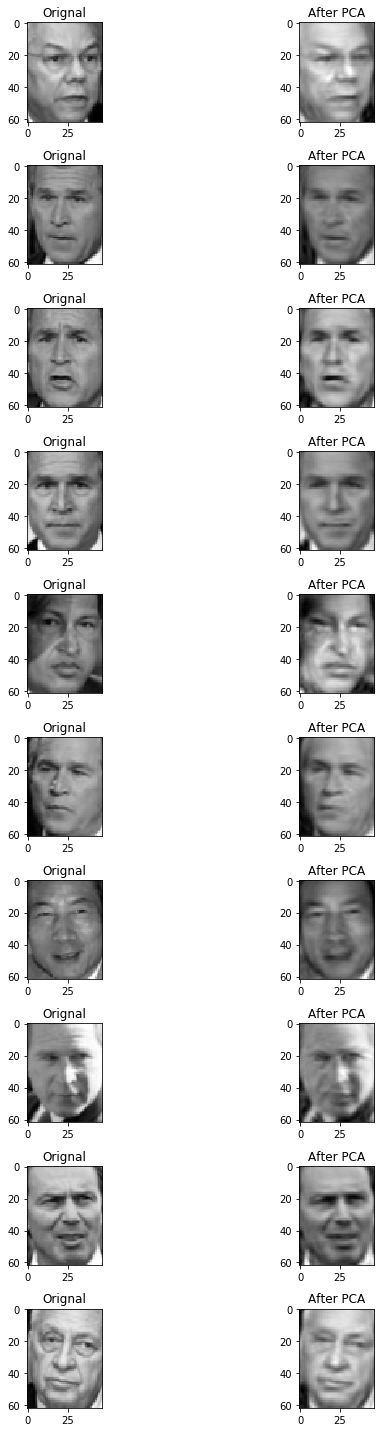

In [28]:
# Visualizing first 10 images
fig, axes = plt.subplots(images, 2, figsize=(images, 2*images))

for i, pos in enumerate(axes):
    pos[0].imshow(images_original[i], cmap='gray')
    pos[0].set_title("Orignal")
    pos[1].imshow(images_reversed[i], cmap='gray')
    pos[1].set_title("After PCA")

fig.tight_layout()
plt.show()

There is a minor loss in surrounding information when PCA is performed. The main features however are still accurately represented. This when compared to the small fraction of size the transformed data takes, as compared to the original size makes the transformation worth it

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [29]:
data4 = pd.DataFrame(np.loadtxt('data_X.txt'))
data4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
X = data4.drop(columns=[13]).to_numpy()
y = data4[13]

In [31]:
model = PolynomialFeatures(3)
X_transformed = model.fit_transform(X)

In [32]:
lamdas = [10, 100, 1000]
alphas = [0.01, 0.001, 0.0001]
max_iters = 1000
scores = []

In [33]:
for lamda in lamdas:
    model = RidgeCV(alphas=[lamda], cv = 5)
    model.fit(X_transformed, y)
    scores.append(model.score(X_transformed, y))

In [34]:
print("Best lamda Value:", lamdas[np.argmax(scores)])

Best lamda Value: 1000


Note that for this particular implementation of ridge regression, the best learning rate is automatically chosen based on the data set provided, and is then used in ridge regression